**Step 1: Install Required Libraries**

(pip install pandas requests matplotlib seaborn)

**Step 2: Pull Data from the API**

This code fetches cryptocurrency data from the CoinGecko API.

In [2]:
import requests

# Define the API URL for live cryptocurrency data
url_api = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd'

# Fetch the data from the API
response = requests.get(url_api)
data = response.json()

# Verify the fetched data
print(data)


[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 102665, 'market_cap': 2032486035926, 'market_cap_rank': 1, 'fully_diluted_valuation': 2032486035926, 'total_volume': 60484403709, 'high_24h': 105911, 'low_24h': 101526, 'price_change_24h': -3246.2827918225667, 'price_change_percentage_24h': -3.06511, 'market_cap_change_24h': -61480178033.25806, 'market_cap_change_percentage_24h': -2.93606, 'circulating_supply': 19813878.0, 'total_supply': 19813878.0, 'max_supply': 21000000.0, 'ath': 108786, 'ath_change_percentage': -5.81965, 'ath_date': '2025-01-20T09:11:54.494Z', 'atl': 67.81, 'atl_change_percentage': 150992.91503, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2025-01-23T06:09:45.879Z'}, {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://coin-images.coingecko.com/coins/images/279/large/ethereum.png?1696501628', 'current_price': 3

**Step 3: Convert JSON to DataFrame**
use pandas to normalize the JSON data into a DataFrame.

In [3]:
import pandas as pd

# Normalize the JSON data into a DataFrame
df = pd.json_normalize(data)

# Add a timestamp column with the current time
df['timestamp'] = pd.to_datetime('now')

# Display the DataFrame
print(df.head())


         id symbol      name  \
0   bitcoin    btc   Bitcoin   
1  ethereum    eth  Ethereum   
2    ripple    xrp       XRP   
3    tether   usdt    Tether   
4    solana    sol    Solana   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...  102665.000000   
1  https://coin-images.coingecko.com/coins/images...    3214.350000   
2  https://coin-images.coingecko.com/coins/images...       3.140000   
3  https://coin-images.coingecko.com/coins/images...       0.999358   
4  https://coin-images.coingecko.com/coins/images...     249.390000   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  2032486035926                1            2032486035926   60484403709   
1   387604715270                2             387604715270   22342190585   
2   180793123690                3             314028868073    7618089626   
3   138517982386                4             138517982386  106940290099   


**Step 4: Save Data to CSV**


In [4]:
# Save the DataFrame to a CSV file
df.to_csv("Crypto_Data.csv", index=False)
print("DataFrame has been saved to Crypto_Data.csv")


DataFrame has been saved to Crypto_Data.csv


**Step 5: Perform Basic Analysis**


In [ ]:
a.Summary statistics of numeric columns:

In [5]:
# Summary statistics
print(df.describe())


       current_price    market_cap  market_cap_rank  fully_diluted_valuation  \
count     100.000000  1.000000e+02       100.000000             1.000000e+02   
mean     5464.095045  3.539290e+10        50.500000             3.943799e+10   
min         0.000015  1.243037e+09         1.000000             1.243037e+09   
25%         0.822227  1.839071e+09        25.750000             2.085571e+09   
50%         3.745000  3.267192e+09        50.500000             5.201975e+09   
75%        41.502500  8.466510e+09        75.250000             1.262164e+10   
max    102665.000000  2.032486e+12       100.000000             2.032486e+12   
std     22392.332176  2.070353e+11        29.011492             2.082541e+11   

       total_volume       high_24h        low_24h  price_change_24h  \
count  1.000000e+02     100.000000     100.000000        100.000000   
mean   2.610858e+09    5642.493989    5410.161477       -174.889396   
min    1.559810e+05       0.000016       0.000015      -3417.55673

b.Find the top 5 cryptocurrencies by market cap:

In [6]:
# Sort the DataFrame by market cap in descending order
top_5 = df.sort_values(by='market_cap', ascending=False).head(5)
print("Top 5 cryptocurrencies by market cap:")
print(top_5[['name', 'market_cap']])


Top 5 cryptocurrencies by market cap:
       name     market_cap
0   Bitcoin  2032486035926
1  Ethereum   387604715270
2       XRP   180793123690
3    Tether   138517982386
4    Solana   121314592552


c.Check for missing values:

In [7]:
# Check for missing values
print(df.isnull().sum())


id                                    0
symbol                                0
name                                  0
image                                 0
current_price                         0
market_cap                            0
market_cap_rank                       0
fully_diluted_valuation               0
total_volume                          0
high_24h                              0
low_24h                               0
price_change_24h                      0
price_change_percentage_24h           0
market_cap_change_24h                 0
market_cap_change_percentage_24h      0
circulating_supply                    0
total_supply                          0
max_supply                           45
ath                                   0
ath_change_percentage                 0
ath_date                              0
atl                                   0
atl_change_percentage                 0
atl_date                              0
roi                                 100


**Step 6: Data Visualization**

a.Visualize the top 10 cryptocurrencies by current price:

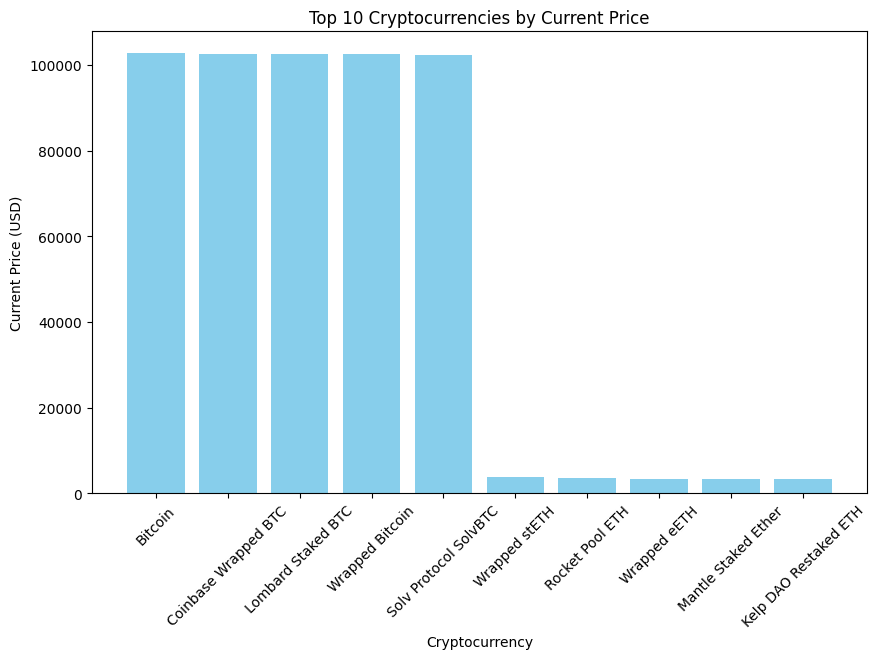

In [8]:
import matplotlib.pyplot as plt

# Sort the data by current price and take the top 10
top_10_by_price = df.sort_values(by='current_price', ascending=False).head(10)

# Create a bar chart to visualize the top 10 cryptocurrencies by price
plt.figure(figsize=(10, 6))
plt.bar(top_10_by_price['name'], top_10_by_price['current_price'], color='skyblue')
plt.xlabel('Cryptocurrency')
plt.ylabel('Current Price (USD)')
plt.title('Top 10 Cryptocurrencies by Current Price')
plt.xticks(rotation=45)
plt.show()


b.Visualize the correlation between market cap and total volume:

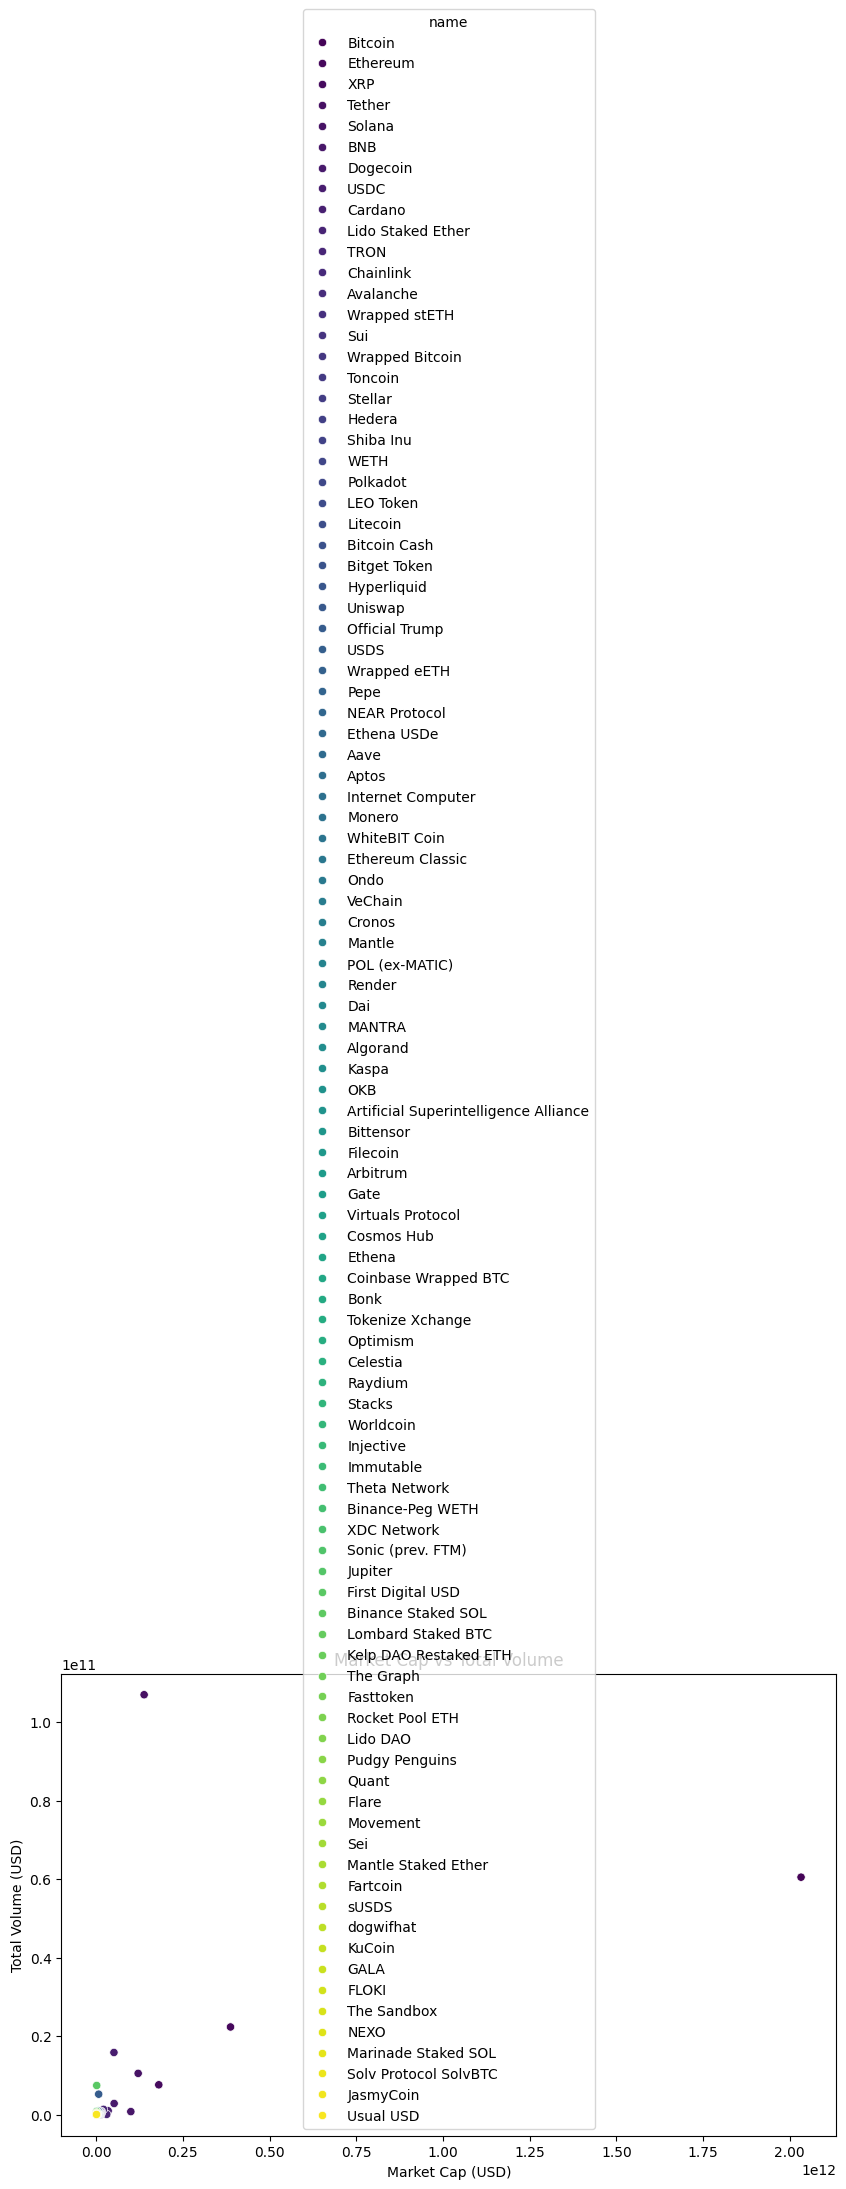

In [9]:
import seaborn as sns

# Scatter plot showing the relationship between market cap and total volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='market_cap', y='total_volume', hue='name', palette='viridis')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Total Volume (USD)')
plt.title('Market Cap vs Total Volume')
plt.show()
